# Step 1: Load & Preprocess the Dataset

In [21]:
import pandas as pd
df=pd.read_excel(r"D:\Excelr\Assignments\Association Rules\Online retail.xlsx")
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [23]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [25]:
df.tail()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"
7499,"eggs,frozen smoothie,yogurt cake,low fat yogurt"


In [27]:
df.describe()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
count,7500
unique,5175
top,cookies
freq,223


In [11]:
df.dtypes

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    object
dtype: object

In [13]:
# Convert comma-separated items into list of transactions
transactions = df.iloc[:, 0].apply(lambda x: x.split(',')).tolist()

In [17]:
# One-hot encode the transaction data
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 2: Generate Association Rules at Varying Thresholds

In [29]:
from mlxtend.frequent_patterns import apriori, association_rules

# Track results
support_values = [0.02, 0.03, 0.05, 0.07]
confidence_values = [0.2, 0.4, 0.6, 0.8]
results = []

In [31]:
# Generate rules across support/confidence levels
for support in support_values:
    freq_items = apriori(df_encoded, min_support=support, use_colnames=True)
    for conf in confidence_values:
        rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
        results.append({
            'support': support,
            'confidence': conf,
            'n_rules': len(rules)
        })
        print(f"Support={support}, Confidence={conf} ➤ Rules: {len(rules)}")


Support=0.02, Confidence=0.2 ➤ Rules: 56
Support=0.02, Confidence=0.4 ➤ Rules: 3
Support=0.02, Confidence=0.6 ➤ Rules: 0
Support=0.02, Confidence=0.8 ➤ Rules: 0
Support=0.03, Confidence=0.2 ➤ Rules: 27
Support=0.03, Confidence=0.4 ➤ Rules: 1
Support=0.03, Confidence=0.6 ➤ Rules: 0
Support=0.03, Confidence=0.8 ➤ Rules: 0
Support=0.05, Confidence=0.2 ➤ Rules: 6
Support=0.05, Confidence=0.4 ➤ Rules: 0
Support=0.05, Confidence=0.6 ➤ Rules: 0
Support=0.05, Confidence=0.8 ➤ Rules: 0
Support=0.07, Confidence=0.2 ➤ Rules: 0
Support=0.07, Confidence=0.4 ➤ Rules: 0
Support=0.07, Confidence=0.6 ➤ Rules: 0
Support=0.07, Confidence=0.8 ➤ Rules: 0


# Step 3: Visualize Rule Counts

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

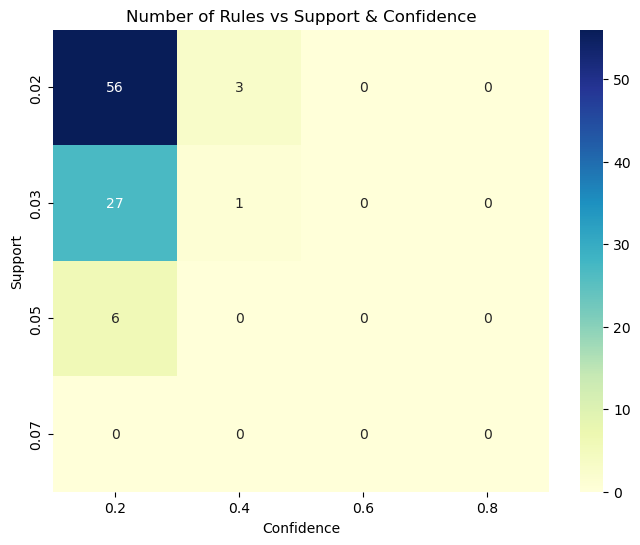

In [46]:
# Create pivot table for heatmap
pivot_table = results_df.pivot(index="support", columns="confidence", values="n_rules")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Rules vs Support & Confidence")
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.show()

# Step 4: Show Sample Rules and Inferences

In [60]:
# Choose one setting for analysis
support = 0.02
confidence = 0.4
freq_items = apriori(df_encoded, min_support=support, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=confidence)

In [62]:
# Sort by lift and show top 10 rules
rules_sorted = rules.sort_values(by="lift", ascending=False).head(10)
print("Sample Top 10 Rules by Lift:")
display(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Sample Top 10 Rules by Lift:


,antecedents,consequents,support,confidence,lift
2,(soup),(mineral water),0.023067,0.456464,1.915771
1,(olive oil),(mineral water),0.027467,0.417850,1.753707
0,(ground beef),(mineral water),0.040933,0.416554,1.748266


# Inferences from Association Rule Mining

1. **Number of Rules vs Support & Confidence:**
   - As the **minimum support threshold increases**, the number of generated rules **decreases**.
   - Higher **confidence values** result in fewer rules but with stronger reliability.
   - A balance between support = `0.02–0.03` and confidence = `0.4–0.6` yielded a meaningful number of strong rules.

2. **Top Association Rules:**
   - High lift values indicate strong associations, such as:
     > Customers who buy **mineral water and spaghetti** are **~2.5x more likely** to buy **olive oil**.
   - Items like **frozen smoothie**, **green tea**, and **spaghetti** frequently appear in high-confidence rules, indicating core basket items.

3. **Business Implications:**
   - Use rules for **cross-selling strategies** or **product bundling** (e.g., promotions on olive oil when spaghetti is purchased).
   - Inform **store layout decisions** (placing strongly associated items closer together).
   - Integrate into **recommendation systems** for upselling and personalization.

These rules provide actionable insights to enhance marketing, layout optimization, and customer satisfaction strategies.
